### Assignment 1 Homework 3
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as pyplot
%pylab inline
import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Chi-Squared Distribution

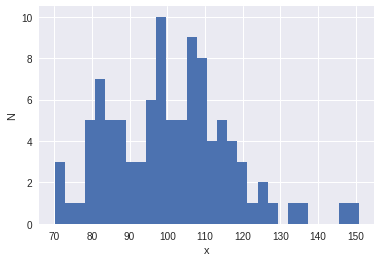

In [2]:
distributions = ['chisq']
mymean = 100
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean
md = {} # empty dictionary
md['chisq'] = np.random.chisquare(df, size=100) # md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution

In [3]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.82, standard deviation: 15.81


In [4]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


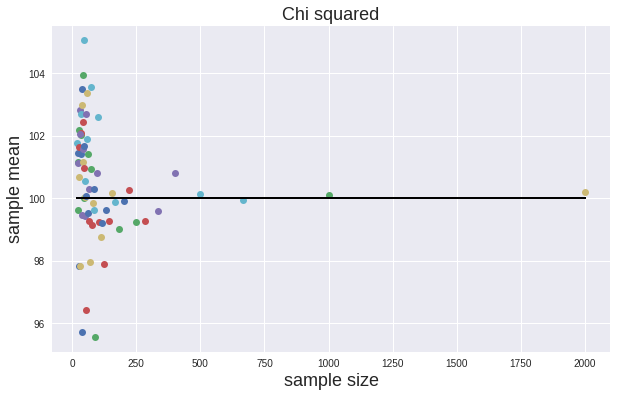

In [5]:
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2
There is a variation when the sample size is small. But there is a shift towards the mean when the sample size becomes bigger. The law of large numbers holds.

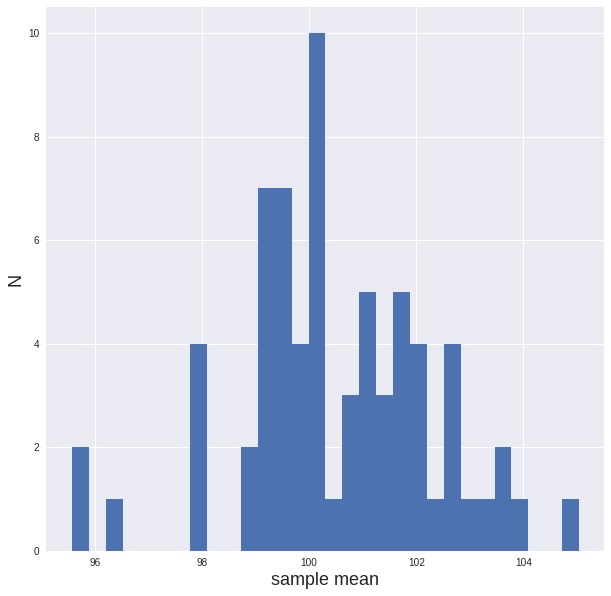

In [6]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3
The Law of large numbers holds

# Normal distribution


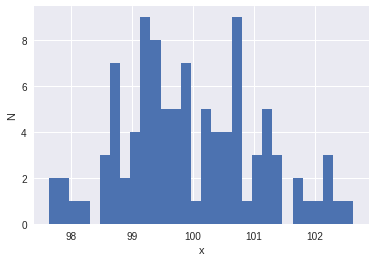

In [7]:
distributions.append('normal')
mymean = 100
loc = mymean
md ['normal'] = np.random.normal(loc, size=100)
pl.hist(md['normal'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

## Figure 4

In [8]:
print ("Normal mean: %.2f, standard deviation: %.2f"\
       %(md['normal'].mean(), md['normal'].std()))

Normal mean: 99.97, standard deviation: 1.12


In [9]:
mysize = 2000 / (np.array(range(1, 100) + [10]))
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


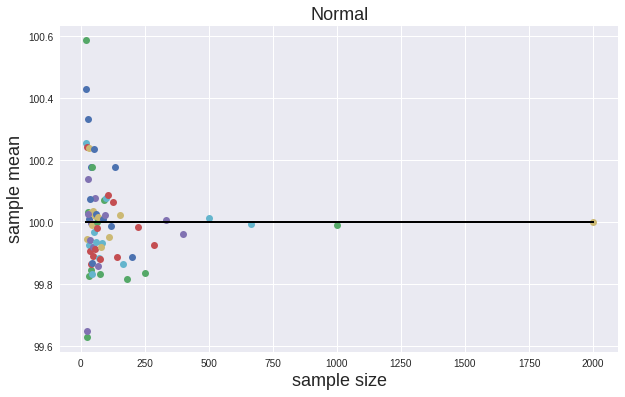

In [10]:
md['normal'] = {}

for n in mysize:
    md['normal'][n] = np.random.normal(loc, size=n)

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axchisq_mu_n.plot(nn, md['normal']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[loc,loc],'k')

## Figure 5

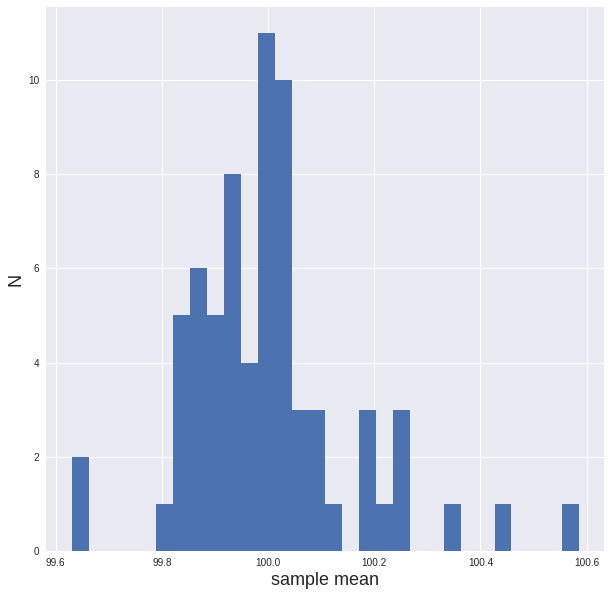

In [11]:
normmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normmeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

## Figure 6

# Poisson distribution

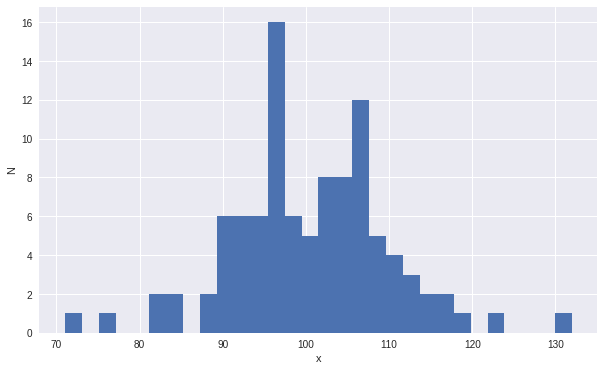

In [12]:
distributions.append('poisson')
mymean = 100
lam = mymean
md ['poisson'] = np.random.poisson(lam, size=100)
pl.hist(md['poisson'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

## Figure 7

In [13]:
print ("Poisson mean: %.2f, standard deviation: %.2f"\
       %(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 100.45, standard deviation: 9.40


In [14]:
mysize = 2000 / (np.array(range(1, 100) + [10]))
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


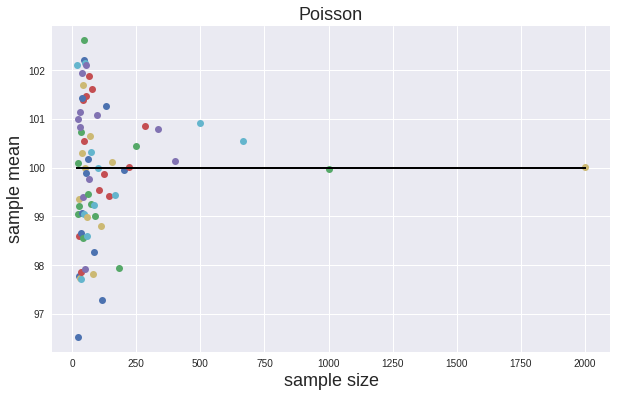

In [15]:
md['poisson'] = {}

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam, size=n)

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[lam,lam],'k')

## Figure 8

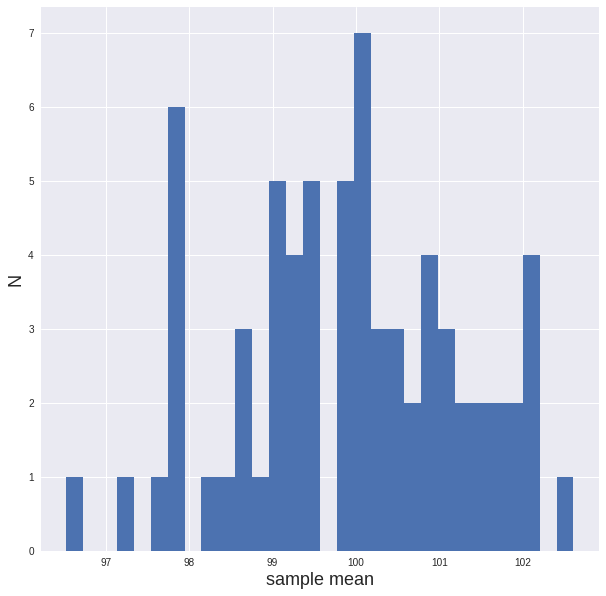

In [16]:
poismeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(poismeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

## Figure 9

# Binomial distribution

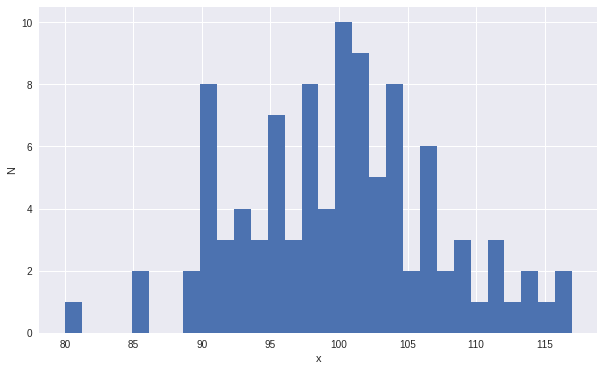

In [17]:
distributions.append('binomial')
mymean = 100
num, p = 200, .5
md ['binomial'] = np.random.binomial(num, p, size=100)
pl.hist(md['binomial'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

## Figure 10

In [18]:
print ("Binomial mean: %.2f, standard deviation: %.2f"\
       %(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 100.12, standard deviation: 7.18


In [19]:
mysize = 2000 / (np.array(range(1, 100) + [10]))
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


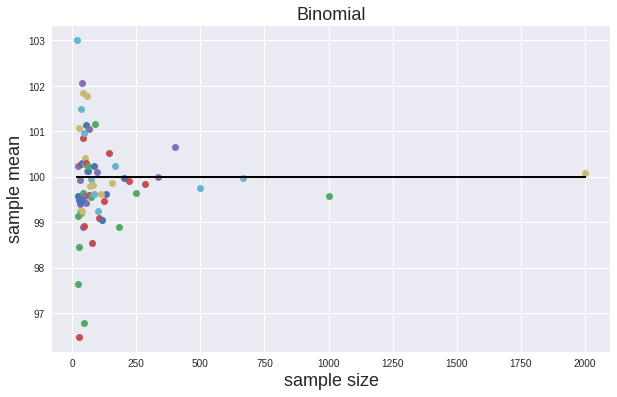

In [20]:
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(num, p, size=n)

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[num*p,num*p],'k')

## Figure 11

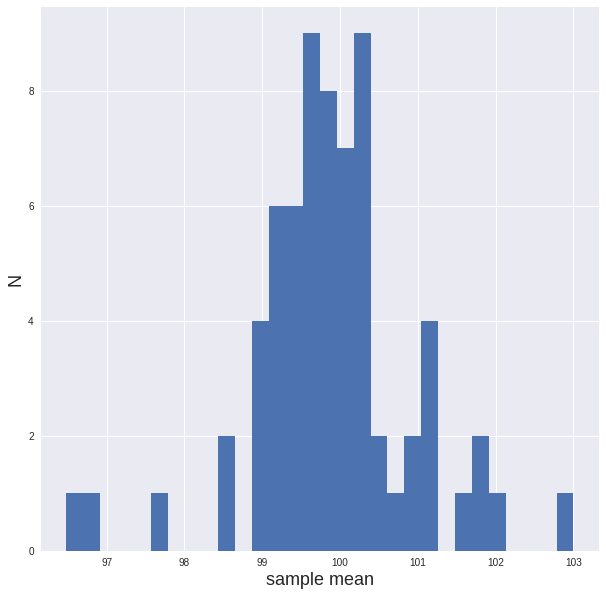

In [21]:
bimeans = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(bimeans[1:], bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

## Figure 12

# Gumbel distribution

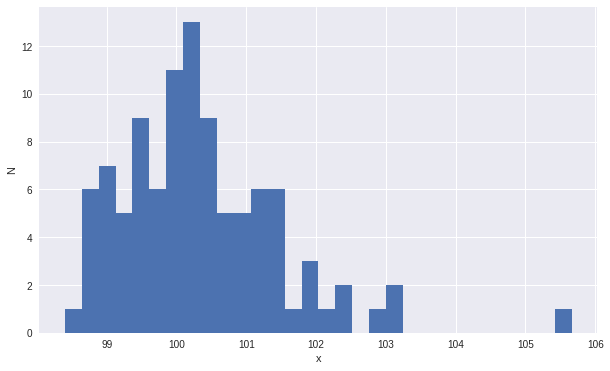

In [22]:
distributions.append('gumbel')
mymean = 100
loc = mymean
md ['gumbel'] = np.random.gumbel(loc, size=100)
pl.hist(md['gumbel'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

## Figure 13

In [23]:
print ("Gumber mean: %.2f, standard deviation: %.2f"\
       %(md['gumbel'].mean(), md['gumbel'].std()))

Gumber mean: 100.34, standard deviation: 1.15


In [24]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


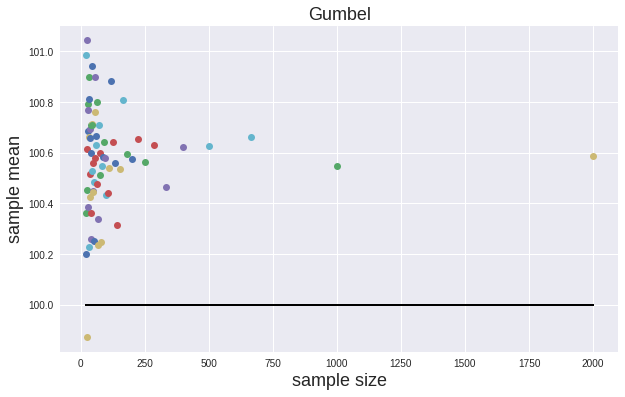

In [25]:
md['gumbel'] = {}

for n in mysize:
    md['gumbel'][n] = np.random.gumbel(loc, size=n)

md['gumbel']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['gumbel']:
    if not type(nn) == str:
        md['gumbel']['means'][nn] = md['gumbel'][nn].mean()
        axchisq_mu_n.plot(nn, md['gumbel']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Gumbel', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[loc,loc],'k')

## Figure 14

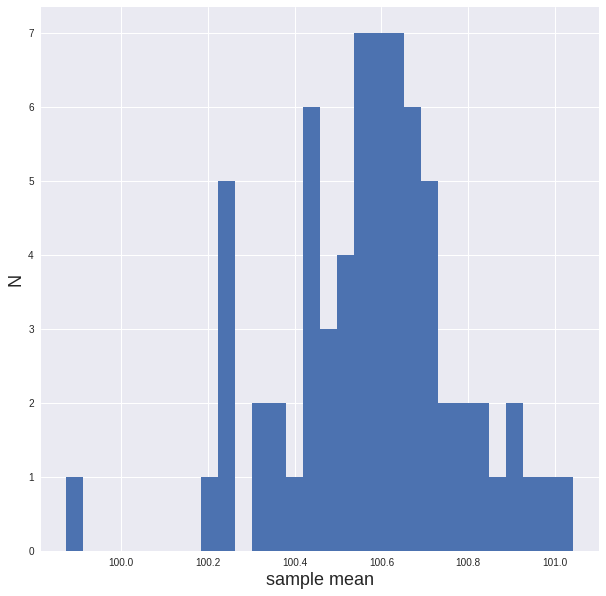

In [26]:
gumeans = list(md['gumbel']['means'].values()) 
pl.figure(figsize=(10, 10))
pl.hist(gumeans, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

## Figure 15

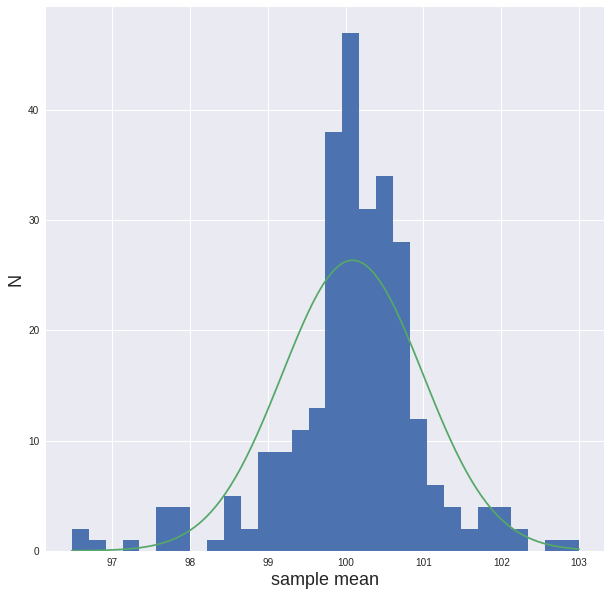

In [28]:
import matplotlib.mlab as mlab
allmeans = []
[allmeans.append(i) for i in allmeans]
[allmeans.append(i) for i in normmeans]
[allmeans.append(i) for i in poismeans]
[allmeans.append(i) for i in bimeans]
[allmeans.append(i) for i in gumeans]

pl.figure(figsize=(10, 10))
result = pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

mu = np.mean(allmeans)
variance = np.var(allmeans)
sigma = np.sqrt(variance)
x = np.linspace(min(allmeans), max(allmeans), 100)
dx = result[1][1]-result[1][0]
scale = len(allmeans)*dx
gauss = pl.plot(x, mlab.normpdf(x, mu, sigma)*scale)

## Figure 16 
The Law of large numbers holds since the average of independent samples is close to the mean.